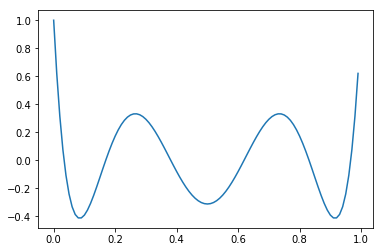

First Max 0.26557560492426346 Second Max 0.7344243980710683
First Min 0.08488805138964634 Second Min 0.08488805138964634 Third Min 0.9151119447447182


In [2]:
import matplotlib.pyplot as plt
import numpy as np
import scipy.optimize as op

x = np.arange(0, 1, 0.01)
def P(x):
    return 924*x**6 - 2772*x**5 + 3150*x**4 - 1680*x**3 + 420*x**2 - 42*x + 1
    
def negP(x):
    return -P(x)

plt.plot(x,P(x))
plt.show()

a,b,c = 0.2,0.3,0.4
#print(P(a),P(b),P(c))
firstMax = op.golden(negP, brack=(a,b,c))

d,e,f = 0.6,0.7,0.8
secondMax = op.golden(negP, brack=(d,e,f))

print("First Max " + str(firstMax) + " Second Max " + str(secondMax))

g,h,i = 0.0,0.1,0.2
firstMin = op.golden(P, brack=(g,h,i))

j,k,l = 0.4,0.5,0.6
secondMin = op.golden(P, brack=(g,h,i))

m,n,o = 0.8,0.9,0.95
thirdMin = op.golden(P, brack=(m,n,o))

print("First Min " + str(firstMin) + " Second Min " + str(secondMin) + " Third Min " + str(thirdMin))

chisq_min/dof =  49.918798671824284
Q =  0.0
chisq_min/dof =  1.091967320736787
Q =  0.25163110406654376
Best Linear Fit  [ 1.22307079 -1.1035417 ]
Best Quadratic Fit  [ 1.44699733 -2.18640181  1.02601921]
Check Linear Fit  (3.397605071971964, 0.33169423814260285)
Check Quadratic Fit  (4.250333007578431, 0.33169423814260285)


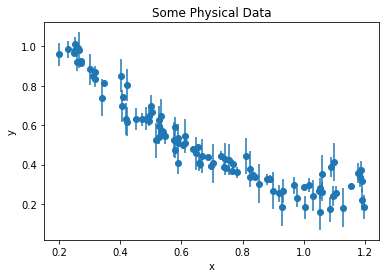

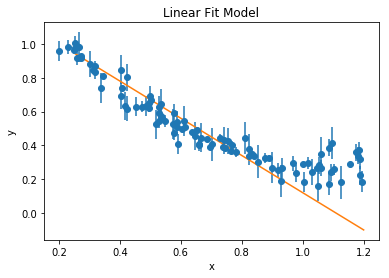

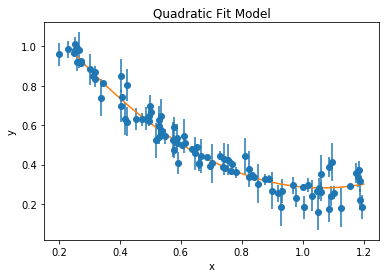

In [3]:
#Lab 8
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.optimize import minimize
from scipy.special import gammaincc

##This is the Some Data##
expData = 'somedata.txt'
myData = np.loadtxt(expData,delimiter=',')

x = myData[:,0]
y = myData[:,1]
sigmay = myData[:,2]

plt.figure()
plt.errorbar(x, y, yerr=sigmay, fmt='o')
plt.xlabel("x")
plt.ylabel("y")
plt.title("Some Physical Data")

##This is the Linear Fit part##
def chisq(params):
    a, b = params
    return np.sum( (a + b*x - y)**2/sigmay**2 )

initial_guess = [0.25, -5]
minimize(chisq, initial_guess)

dof = len(myData) - 2
chisq_min = minimize(chisq, initial_guess).fun

print("chisq_min/dof = ", chisq_min/dof)
print("Q = ", gammaincc(dof/2, chisq_min/2))

plt.figure()
plt.errorbar(x, y, yerr=sigmay, fmt='o')

best_fit_lin = minimize(chisq, initial_guess).x
x_for_plot = np.linspace(0.25, 1.2, 100)
plt.plot(x_for_plot, best_fit_lin[0] + best_fit_lin[1]*x_for_plot)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Linear Fit Model")

##This is the Quadratic Fit part##
def chisq(params):
    a, b, c = params
    return np.sum( (a + b*x + c*x**2 - y)**2/sigmay**2 )

initial_guess = [3, 0.25, -5]
minimize(chisq, initial_guess)

dof = len(myData) - 2
chisq_min = minimize(chisq, initial_guess).fun

print("chisq_min/dof = ", chisq_min/dof)
print("Q = ", gammaincc(dof/2, chisq_min/2))

plt.figure()
plt.errorbar(x, y, yerr=sigmay, fmt='o')

best_fit_quad = minimize(chisq, initial_guess).x
x_for_plot = np.linspace(0.25, 1.2, 100)
plt.plot(x_for_plot, best_fit_quad[0] + best_fit_quad[1]*x_for_plot + best_fit_quad[2]*x_for_plot**2)

plt.xlabel("x")
plt.ylabel("y")
plt.title("Quadratic Fit Model")

##Print the Best Fit values##
print("Best Linear Fit ", best_fit_lin)
print("Best Quadratic Fit ", best_fit_quad)

##Checking best fit values##
chkLin = np.exp(best_fit_lin[0]), np.exp(best_fit_lin[1])
chkQuad = np.exp(best_fit_quad[0]), np.exp(best_fit_lin[1])

##Printing the check##
print("Check Linear Fit ", chkLin)
print("Check Quadratic Fit ", chkQuad)

In [21]:
#Lab 9
import matplotlib.pyplot as plt
import numpy as np
import math
import scipy.linalg as ln

A = np.loadtxt('lab9_data.txt')

def f(params):
    a1,a2,a3 = params
    return a1*log(x) + a2*sin(x)*cos(x) + a3*exp(-x**2+15)

ln.svd(A)

(array([[-0.0977057 ,  0.11760974, -0.0674532 , ..., -0.09969566,
         -0.09773937, -0.10247457],
        [-0.09706824,  0.08701522, -0.09541522, ...,  0.17240307,
          0.20055651,  0.18732836],
        [-0.09725396,  0.09305507, -0.1321586 , ..., -0.00995029,
         -0.05736238,  0.10753614],
        ...,
        [-0.10032473, -0.17206701, -0.00706854, ...,  0.95989258,
         -0.04530971, -0.04130332],
        [-0.09967683, -0.20021383, -0.05453336, ..., -0.04553081,
          0.94632147, -0.04194054],
        [-0.10003455, -0.18683274,  0.1106681 , ..., -0.0409564 ,
         -0.04135613,  0.94550874]]),
 array([145.72016896,   3.51004763,   0.28358286]),
 array([[-0.72335574, -0.69046592, -0.00364555],
        [-0.69045025,  0.72327397,  0.01237799],
        [-0.00590985,  0.01147076, -0.99991674]]))

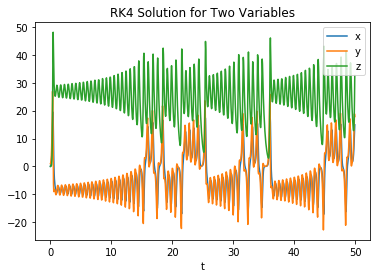

In [2]:
#Lab 12
#Exercise 1
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

sigma = 10
r = 28
b = 8/3
x,y,z = (0,1,0)
start = 0 
end = 50
numSteps = 1000
stepSize = (end-start)/numSteps

def f(A,t):
    x = A[0]
    y = A[1]
    z = A[2]
    fx = sigma*(y-x)
    fy = r*x - y - x*z
    fz = x*y-b*z
    return np.array([fx,fy,fz],float)

tpoints = np.arange(start, end, stepSize)
xpoints = []
ypoints = []
zpoints = []
A = np.array([x,y,z],float)

for t in tpoints:
    xpoints.append(A[0])
    ypoints.append(A[1])
    zpoints.append(A[2])
    k1 = stepSize*f(A,t)        
    k2 = stepSize*f(A+0.5*k1,t+0.5*stepSize)   
    k3 = stepSize*f(A+0.5*k2,t+0.5*stepSize)
    k4 = stepSize*f(A+k3,t+stepSize)
    A += (k1+2.*k2+2.*k3+k4)/6
    
plt.plot(tpoints,xpoints,label='x')
plt.plot(tpoints,ypoints,label='y')
plt.plot(tpoints,zpoints,label='z')
plt.title("RK4 Solution for Two Variables")
plt.xlabel("t")
plt.legend(loc='upper right')

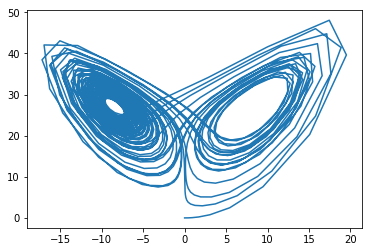

In [3]:
plt.plot(xpoints,zpoints)

In [4]:
#Exercise 2
# This code is adapted from Mark Newman's book

import numpy as np

# import physical constants from SciPy
from scipy.constants import hbar, m_e, e


V_0 = 50*e #eV
a = 10e-11

# numerical parameters
numSteps = 1000
stepSize = (20*a)/numSteps

# Potential function => trivial in this example
# (but we can easily generalize the problem by replacing this by a complicated potential!)
def V(x):
    return (V_0*x**2)/a**2

# Schroedinger equation
def f(r,x,E):
    psi = r[0]
    phi = r[1]    # this is what we will call the derivative of psi
    fpsi = phi    # we turned the second order equation into two first order equations, as usual
    fphi = (2*m_e/hbar**2)*(V(x)-E)*psi
    return np.array([fpsi,fphi],float)

# Calculate the wavefunction for a particular energy with RK4
def solve(E):
    psi = 0.0
    phi = 1.0     # the initial condition for phi doesn't matter => only affects normalization
    r = np.array([psi,phi],float)

    for x in np.arange(-10/a,10/a,stepSize):
        k1 = stepSize*f(r,x,E)
        k2 = stepSize*f(r+0.5*k1,x+0.5*stepSize,E)
        k3 = stepSize*f(r+0.5*k2,x+0.5*stepSize,E)
        k4 = stepSize*f(r+k3,x+stepSize,E)
        r += (k1+2*k2+2*k3+k4)/6

    return r[0]

# Main program to find the energy using the secant method
E1 = 0.0
E2 = e
psi2 = solve(E1)

target = e/1000
while abs(E1-E2)>target:
    psi1, psi2 = psi2, solve(E2)
    E1, E2 = E2, E2-psi2*(E2-E1)/(psi2-psi1)

print("E =",E2/e,"eV")

ValueError: Maximum allowed size exceeded

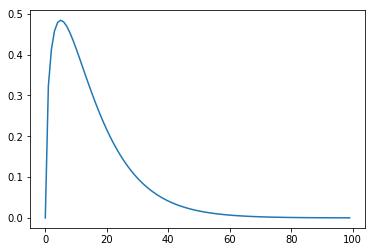

In [4]:
#Lab 13
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from scipy.constants import e

n = 1000
cutoff = 10
x = np.arange(0, cutoff, 0.1)

def p(x):
    return 2*np.sqrt(x/np.pi)*np.exp(-x)

plt.plot(p(x))

Average number of trials:  4.886


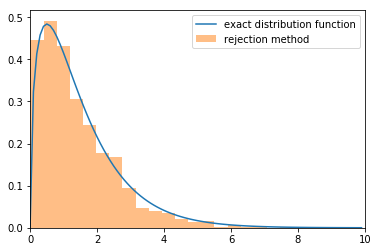

In [32]:
# implementation of the rejection method using the above comparison function
counter = 0

def exp_rejection():
    global counter
    # repeat until acceptance
    accept = False
    x0 = 0
    while(accept == False):
        counter += 1
        
        x0 = 10*np.random.rand()
        y0 = 0.5*np.random.rand()

        # accept or reject
        if y0 < p(x0):
            accept = True
    return x0

rejection_data = []
for i in range(n):
    rejection_data = np.append(rejection_data, exp_rejection())

print("Average number of trials: ", counter/n)
    
# compare results
plt.plot(x, p(x), label = 'exact distribution function')
plt.hist(rejection_data, bins = 20, density = True,\
        alpha = 0.5, label = 'rejection method')
plt.xlim(0,cutoff)
plt.legend()
plt.show()

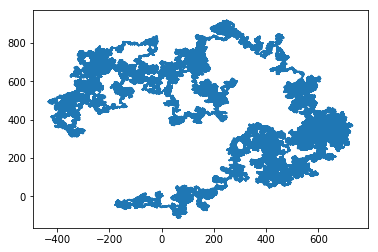

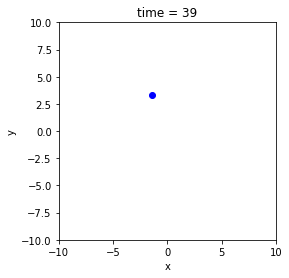

In [17]:
%matplotlib inline
import numpy as np
import numpy.random as nprand
import matplotlib.pyplot as plt
import matplotlib.animation as animation

nwalkers=1
nsteps= 1000000

steparr=nprand.rand(nwalkers,nsteps,2)-0.5  # all nwalk*nstep*ndim random numbers
xsteps=np.zeros((nwalkers,nsteps))          # cumulative x positions
ysteps=np.zeros((nwalkers,nsteps))          # cumulative y positions

for i in range(nwalkers):          # loop over walkers
    for j in range(1,nsteps):      # loop over steps all start at 0,0
        r=np.sqrt(steparr[i,j,0]**2 + steparr[i,j,1]**2)   # normalize step size to 1
        xsteps[i,j]=xsteps[i,j-1] + steparr[i,j,0]/r
        ysteps[i,j]=ysteps[i,j-1] + steparr[i,j,1]/r

for k in range(nwalkers):
    plt.plot(xsteps[k,:],ysteps[k,:])
    
#Stuff for animation
fig = plt.figure()
plt.xlim(-10,10)
plt.ylim(-10,10)
plt.gca().set_aspect('equal', adjustable='box')

    
def animate(i):
      
    if i > 0:
        plt.cla()
        plt.xlim(-10,10)
        plt.ylim(-10,10)
        plt.scatter(xsteps[0,i],ysteps[0,i],c='b')
        plt.xlabel('x')
        plt.ylabel('y')
        plt.title('time = %d' %i)
    
simulation = animation.FuncAnimation(fig, animate, frames = 40, repeat = False)

from IPython.display import HTML
HTML(simulation.to_jshtml())